# heart disease

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
heart_df = pd.read_csv("https://raw.githubusercontent.com/shaunzhao666/midterm_object/code/heart.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### the meaning of every column
- age: in years
- sex: 1-male; 0-female
- cp: chest pain type(0, 1, 2, 3)
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: fasting blood sugar > 120 mg/dl (true:1; false:0)
- restech: resting electrocardiographic results (0,1,2)
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- target: have heart disease = 1; no = 0


* visualize the missing data

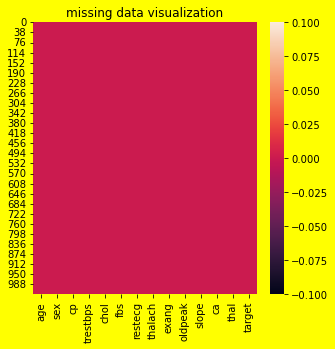

In [9]:
a = plt.figure(figsize=(5, 5), facecolor="yellow")
a = sns.heatmap(heart_df.isna())
a = plt.title("missing data visualization")

* correlation

<AxesSubplot:>

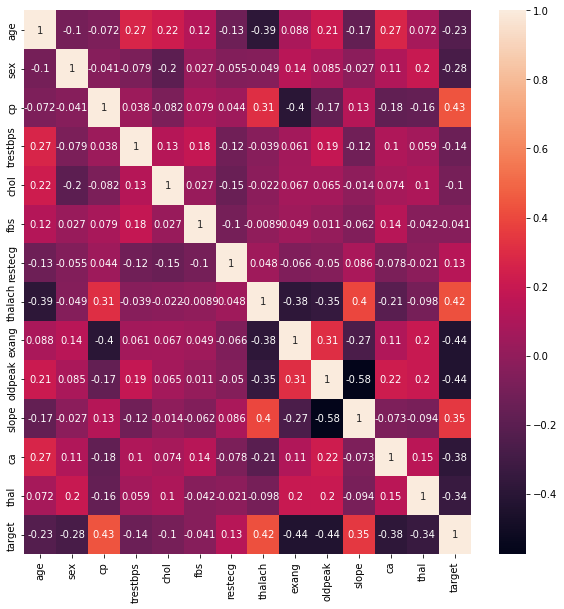

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(heart_df.corr(), annot=True)

the relations with target

high negative: exang, oldpeak

high positive: thalach cp

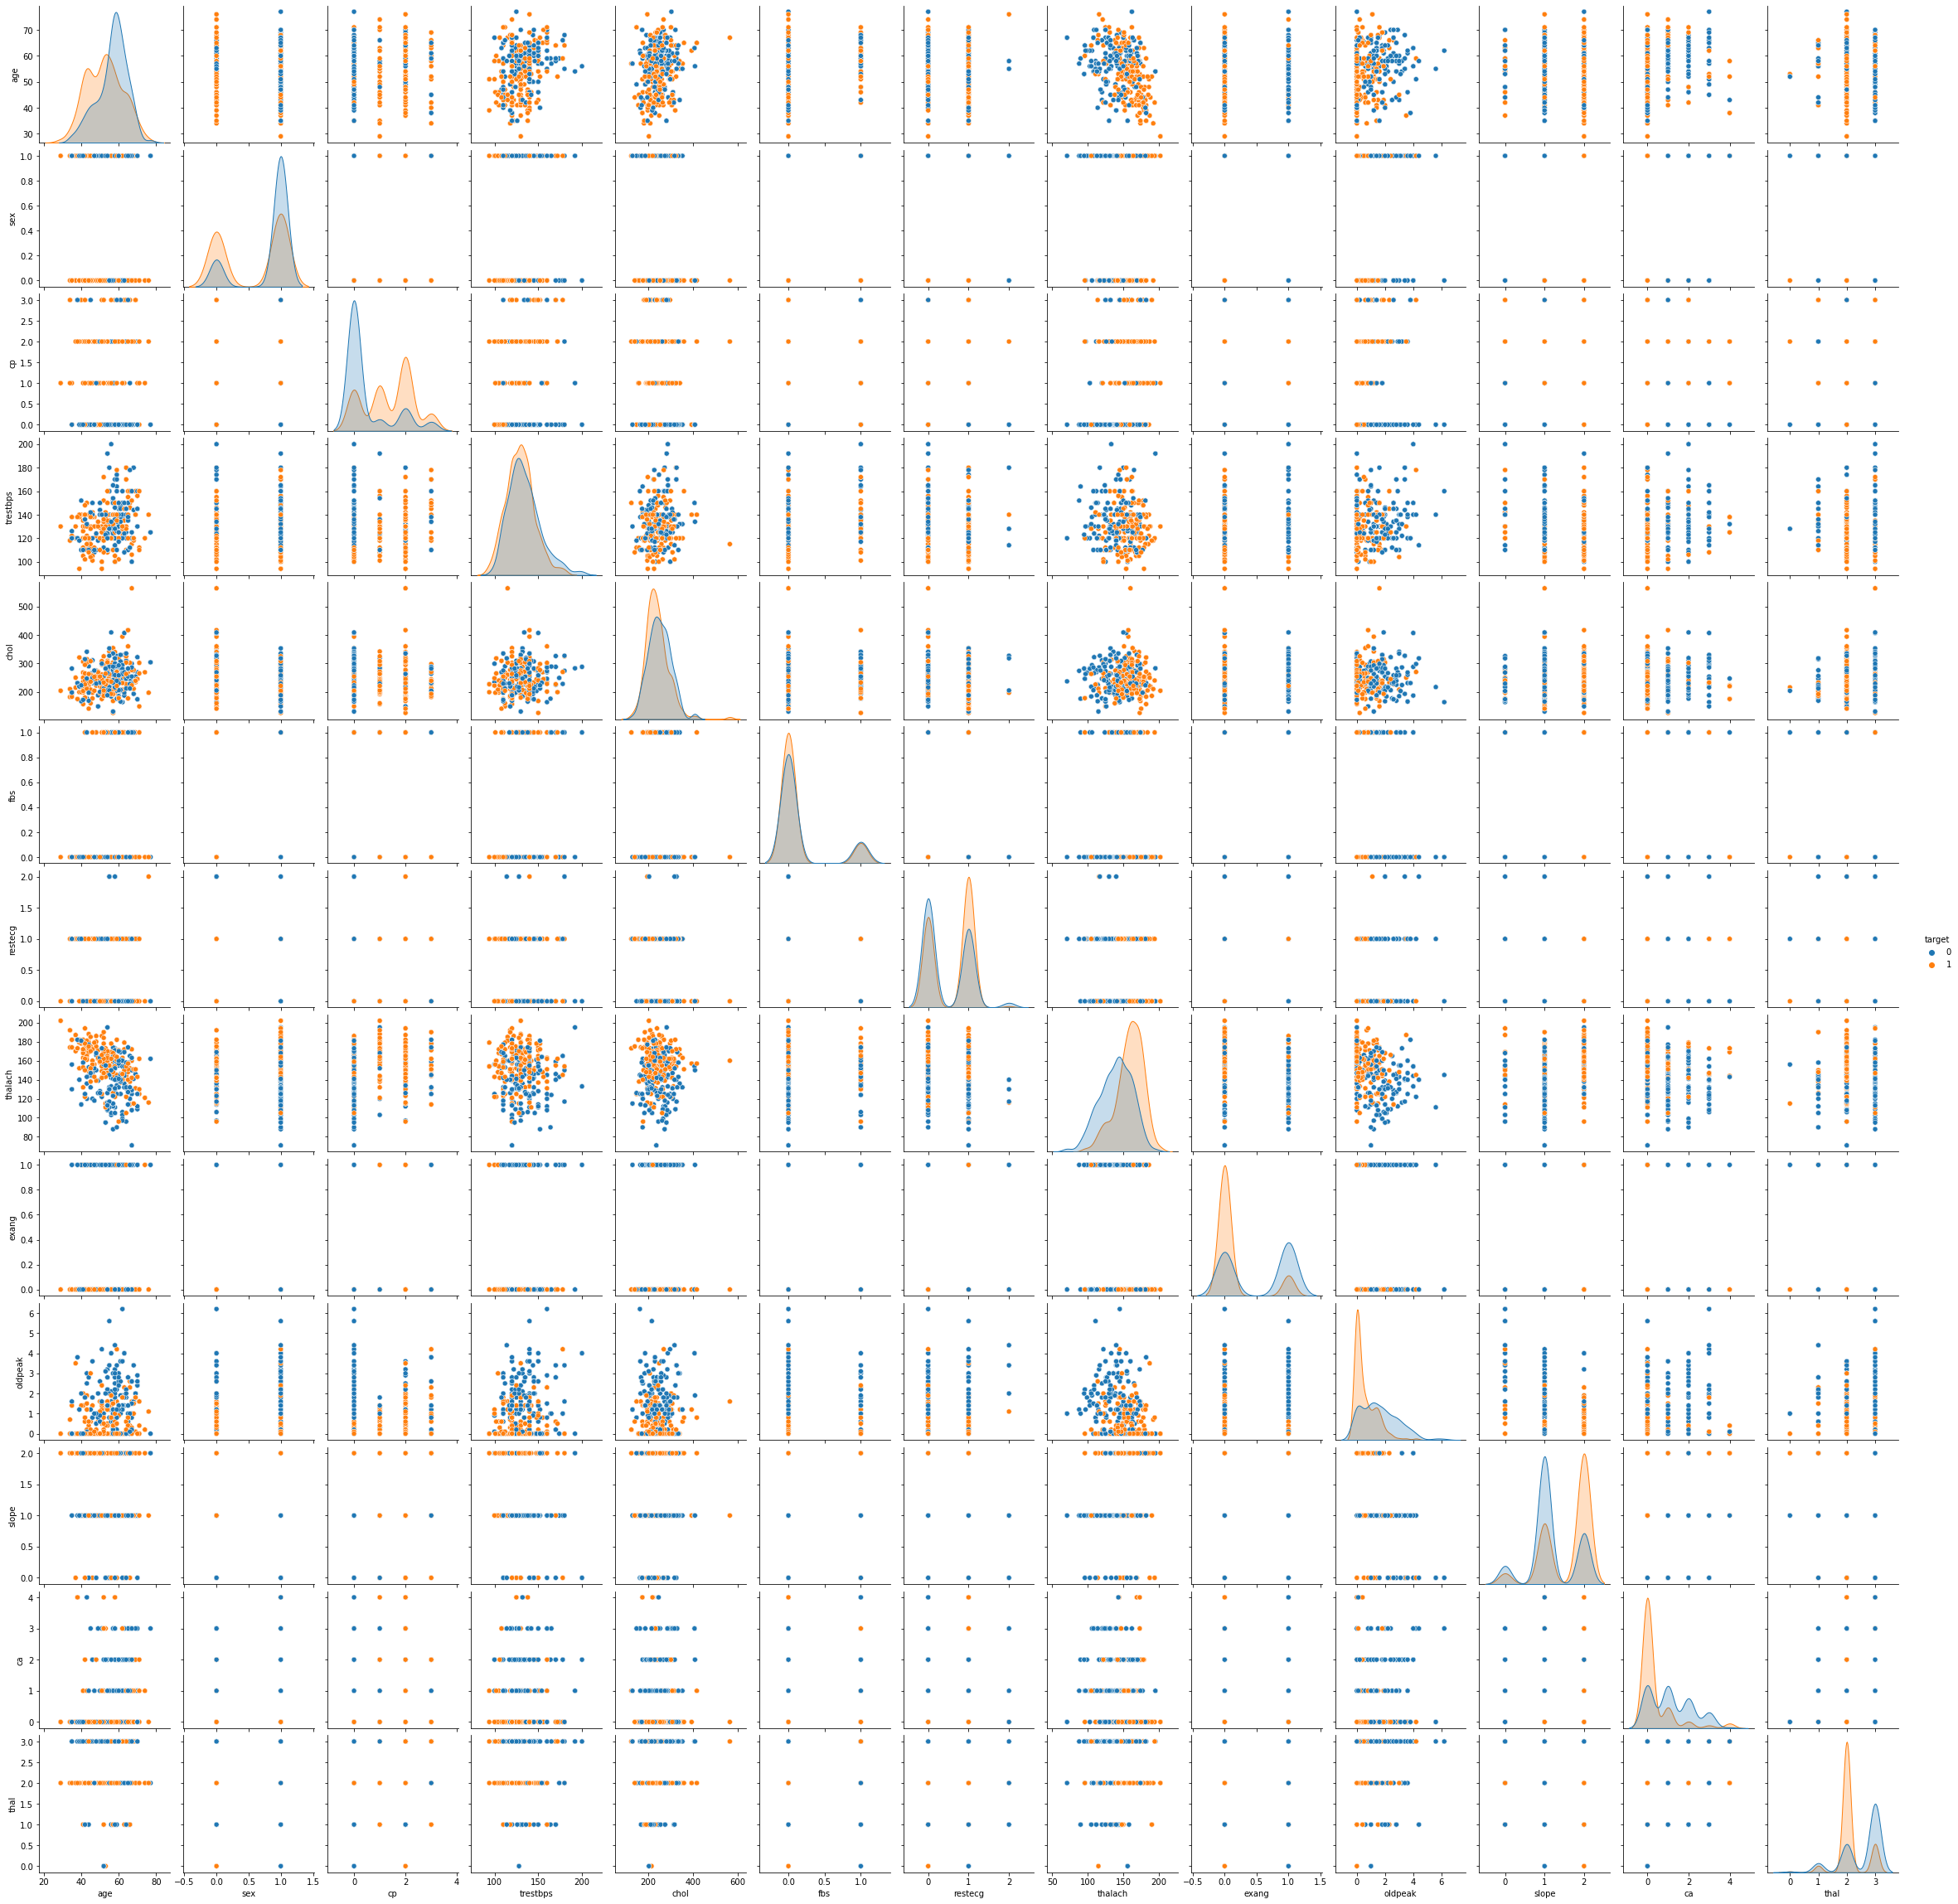

In [8]:
sns.pairplot(heart_df, hue="target")

In [3]:
target0 = heart_df.where(heart_df["target"] == 0).dropna()
target1 = heart_df.where(heart_df["target"] == 1).dropna()

*  the expected value table

In [10]:
names = list(heart_df.columns)
names.pop(-1)
ex_df = pd.DataFrame(index=["with heart diseases", "without heart disease"])
for i in names:
    ex_df[i] = [target1[i].mean(), target0[i].mean()]
ex_df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
with heart diseases,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772
without heart disease,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078


* there are 7 attributes with discrete values: sex, cp, fbs, restecg, exang, slope, ca.

* the risk in sex

In [3]:
male = heart_df.where(heart_df['sex'] == 1).dropna()
female = heart_df.where(heart_df['sex'] == 0).dropna()

rate_male = male["target"].mean()
rate_female=female["target"].mean()
print(f"the proportion of male who got heart diseases: {rate_male}")
print(f"the proportion of female who got heart diseases: {rate_female}")

the proportion of male who got heart diseases: 0.42075736325385693
the proportion of female who got heart diseases: 0.7243589743589743


* the proportion of having heart disease in exang

In [5]:
heart_df["exang"].value_counts()

0    680
1    345
Name: exang, dtype: int64

In [7]:
exang0 = heart_df.where(heart_df["exang"] == 0).dropna()
exang1 = heart_df.where(heart_df["exang"] == 1).dropna()
rate_exang0 = exang0["target"].mean()
rate_exang1 = exang1["target"].mean()
print(f"in exang=0, the proportion of people with heart disease: {rate_exang0}")
print(f"in exang=1, the proportion of people with heart disease: {rate_exang1}")

in exang=0, the proportion of people with heart disease: 0.6691176470588235
in exang=1, the proportion of people with heart disease: 0.20579710144927535


* the proportion of having heart disease in restecg

In [10]:
heart_df["restecg"].value_counts()

1    513
0    497
2     15
Name: restecg, dtype: int64

In [13]:
restecg0 = heart_df.where(heart_df["restecg"] == 0).dropna()
restecg1 = heart_df.where(heart_df["restecg"] == 1).dropna()
restecg2 = heart_df.where(heart_df["restecg"] == 2).dropna()

rate_restecg0 = restecg0["target"].mean()
rate_restecg1 = restecg1["target"].mean()
rate_restecg2 = restecg2["target"].mean()

print(f"in restecg=0, the proportion of people with heart disease: {rate_restecg0}")
print(f"in restecg=1, the proportion of people with heart disease: {rate_restecg1}")
print(f"in restecg=2, the proportion of people with heart disease: {rate_restecg2}")

in restecg=0, the proportion of people with heart disease: 0.4305835010060362
in restecg=1, the proportion of people with heart disease: 0.6023391812865497
in restecg=2, the proportion of people with heart disease: 0.2


In [15]:
exp_restecg_tar0 = target0["restecg"].mean()
exp_restecg_tar1 = target1["restecg"].mean()
print(f"the expected restecg value of people with heart disease is {exp_restecg_tar1}")
print(f"the expected restecg value of people without heart disease is {exp_restecg_tar0}")

the expected restecg value of people with heart disease is 0.5988593155893536
the expected restecg value of people without heart disease is 0.45691382765531063


* thal

In [28]:
heart_df["thal"].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [29]:
thal0 = heart_df.where(heart_df["thal"] == 0).dropna()
thal1 = heart_df.where(heart_df["thal"] == 1).dropna()
thal2 = heart_df.where(heart_df["thal"] == 2).dropna()
thal3 = heart_df.where(heart_df["thal"] == 3).dropna()

rate_thal0 = thal0["target"].mean()
rate_thal1 = thal1["target"].mean()
rate_thal2 = thal2["target"].mean()
rate_thal3 = thal3["target"].mean()

print(f"in thal=0, the proportion of people with heart disease: {rate_thal0}")
print(f"in thal=1, the proportion of people with heart disease: {rate_thal1}")
print(f"in thal=2, the proportion of people with heart disease: {rate_thal2}")
print(f"in thal=3, the proportion of people with heart disease: {rate_thal3}")

in thal=0, the proportion of people with heart disease: 0.42857142857142855
in thal=1, the proportion of people with heart disease: 0.328125
in thal=2, the proportion of people with heart disease: 0.7573529411764706
in thal=3, the proportion of people with heart disease: 0.21951219512195122


In [30]:
exp_thal_tar0 = target0["thal"].mean()
exp_thal_tar1 = target1["thal"].mean()
print(f"the expected thal value of people with heart disease is {exp_thal_tar1}")
print(f"the expected thal value of people without heart disease is {exp_thal_tar0}")

the expected thal value of people with heart disease is 2.1197718631178706
the expected thal value of people without heart disease is 2.5390781563126255


* the proportion of having heart disease in cp

In [4]:
heart_df["cp"].value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [17]:
cp0 = heart_df.where(heart_df["cp"] == 0).dropna()
cp1 = heart_df.where(heart_df["cp"] == 1).dropna()
cp2 = heart_df.where(heart_df["cp"] == 2).dropna()
cp3 = heart_df.where(heart_df["cp"] == 3).dropna()

rate_cp0 = cp0["target"].mean()
rate_cp1 = cp1["target"].mean()
rate_cp2 = cp2["target"].mean()
rate_cp3 = cp3["target"].mean()

print(f"in cp=0, the proportion of people with heart disease: {rate_cp0}")
print(f"in cp=1, the proportion of people with heart disease: {rate_cp1}")
print(f"in cp=2, the proportion of people with heart disease: {rate_cp2}")
print(f"in cp=3, the proportion of people with heart disease: {rate_cp3}")

in cp=0, the proportion of people with heart disease: 0.2454728370221328
in cp=1, the proportion of people with heart disease: 0.8023952095808383
in cp=2, the proportion of people with heart disease: 0.7711267605633803
in cp=3, the proportion of people with heart disease: 0.6623376623376623


In [18]:
exp_cp_tar0 = target0["cp"].mean()
exp_cp_tar1 = target1["cp"].mean()
print(f"the expected cp value of people with heart disease is {exp_cp_tar1}")
print(f"the expected cp value of people without heart disease is {exp_cp_tar0}")

the expected cp value of people with heart disease is 1.3783269961977187
the expected cp value of people without heart disease is 0.48296593186372744


* slope

In [19]:
heart_df["slope"].value_counts()

1    482
2    469
0     74
Name: slope, dtype: int64

In [20]:
slope0 = heart_df.where(heart_df["slope"] == 0).dropna()
slope1 = heart_df.where(heart_df["slope"] == 1).dropna()
slope2 = heart_df.where(heart_df["slope"] == 2).dropna()

rate_slope0 = slope0["target"].mean()
rate_slope1 = slope1["target"].mean()
rate_slope2 = slope2["target"].mean()

print(f"in slope=0, the proportion of people with heart disease: {rate_slope0}")
print(f"in slope=1, the proportion of people with heart disease: {rate_slope1}")
print(f"in slope=2, the proportion of people with heart disease: {rate_slope2}")

in slope=0, the proportion of people with heart disease: 0.3783783783783784
in slope=1, the proportion of people with heart disease: 0.3278008298755187
in slope=2, the proportion of people with heart disease: 0.7249466950959488


In [21]:
exp_slope_tar0 = target0["slope"].mean()
exp_slope_tar1 = target1["slope"].mean()
print(f"the expected slope value of people with heart disease is {exp_slope_tar1}")
print(f"the expected slope value of people without heart disease is {exp_slope_tar0}")

the expected slope value of people with heart disease is 1.5931558935361216
the expected slope value of people without heart disease is 1.1663326653306614


* ca

In [22]:
heart_df["ca"].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

In [23]:
ca0 = heart_df.where(heart_df["ca"] == 0).dropna()
ca1 = heart_df.where(heart_df["ca"] == 1).dropna()
ca2 = heart_df.where(heart_df["ca"] == 2).dropna()
ca3 = heart_df.where(heart_df["ca"] == 3).dropna()
ca4 = heart_df.where(heart_df["ca"] == 4).dropna()

rate_ca0 = ca0["target"].mean()
rate_ca1 = ca1["target"].mean()
rate_ca2 = ca2["target"].mean()
rate_ca3 = ca3["target"].mean()
rate_ca4 = ca4["target"].mean()

print(f"in ca=0, the proportion of people with heart disease: {rate_ca0}")
print(f"in ca=1, the proportion of people with heart disease: {rate_ca1}")
print(f"in ca=2, the proportion of people with heart disease: {rate_ca2}")
print(f"in ca=3, the proportion of people with heart disease: {rate_ca3}")
print(f"in ca=4, the proportion of people with heart disease: {rate_ca4}")

in ca=0, the proportion of people with heart disease: 0.7179930795847751
in ca=1, the proportion of people with heart disease: 0.2920353982300885
in ca=2, the proportion of people with heart disease: 0.15671641791044777
in ca=3, the proportion of people with heart disease: 0.13043478260869565
in ca=4, the proportion of people with heart disease: 0.8333333333333334


In [27]:
exp_ca_tar0 = target0["ca"].mean()
exp_ca_tar1 = target1["ca"].mean()
print(f"the expected ca value of people with heart disease is {exp_ca_tar1}")
print(f"the expected ca value of people without heart disease is {exp_ca_tar0}")

the expected ca value of people with heart disease is 0.37072243346007605
the expected ca value of people without heart disease is 1.1583166332665331


* age

In [31]:
exp_age_tar0 = target0["age"].mean()
exp_age_tar1 = target1["age"].mean()
print(f"the expected age value of people with heart disease is {exp_age_tar1}")
print(f"the expected age value of people without heart disease is {exp_age_tar0}")

the expected age value of people with heart disease is 52.40874524714829
the expected age value of people without heart disease is 56.569138276553105


Text(0, 0.5, 'pro/%')

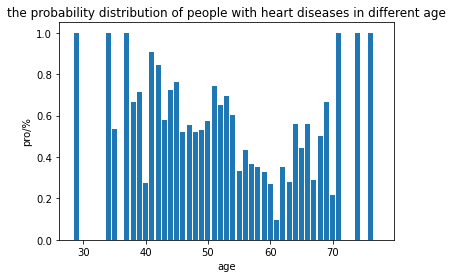

In [54]:
age = list(heart_df["age"].value_counts().index)

pro = []
for i in range(41):
    pro_i = heart_df.where(heart_df["age"]==age[i]).dropna()
    pro.append(pro_i["target"].mean())
plt.figure()
plt.bar(age, pro)
plt.title("the probability distribution of people with heart diseases in different age")
plt.xlabel("age")
plt.ylabel("pro/%")


In [55]:
heart_df.where(heart_df["age"] < 30).dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
60,29.0,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.0,2.0,0.0,2.0,1.0
64,29.0,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.0,2.0,0.0,2.0,1.0
118,29.0,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.0,2.0,0.0,2.0,1.0
668,29.0,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.0,2.0,0.0,2.0,1.0


* continuous value

* trestbps

In [32]:
exp_trestbps_tar0 = target0["trestbps"].mean()
exp_trestbps_tar1 = target1["trestbps"].mean()
print(f"the expected trestbps value of people with heart disease is {exp_trestbps_tar1}")
print(f"the expected trestbps value of people without heart disease is {exp_trestbps_tar0}")

the expected trestbps value of people with heart disease is 129.24524714828897
the expected trestbps value of people without heart disease is 134.1062124248497


* chol

In [33]:
exp_chol_tar0 = target0["chol"].mean()
exp_chol_tar1 = target1["chol"].mean()
print(f"the expected chol value of people with heart disease is {exp_chol_tar1}")
print(f"the expected chol value of people without heart disease is {exp_chol_tar0}")

the expected chol value of people with heart disease is 240.97908745247148
the expected chol value of people without heart disease is 251.2925851703407


* thalach

In [34]:
exp_thalach_tar0 = target0["thalach"].mean()
exp_thalach_tar1 = target1["thalach"].mean()
print(f"the expected thalach value of people with heart disease is {exp_thalach_tar1}")
print(f"the expected thalach value of people without heart disease is {exp_thalach_tar0}")

the expected thalach value of people with heart disease is 158.58555133079847
the expected thalach value of people without heart disease is 139.1302605210421


* old peak

In [35]:
exp_oldpeak_tar0 = target0["oldpeak"].mean()
exp_oldpeak_tar1 = target1["oldpeak"].mean()
print(f"the expected oldpeak value of people with heart disease is {exp_oldpeak_tar1}")
print(f"the expected oldpeak value of people without heart disease is {exp_oldpeak_tar0}")

the expected oldpeak value of people with heart disease is 0.5699619771863115
the expected oldpeak value of people without heart disease is 1.6002004008016042


* hiplot

In [57]:
import hiplot as hip
hip.Experiment.from_dataframe(heart_df).display()

<IPython.core.display.Javascript object>

* scatter plot between thalach and old peak

<AxesSubplot:xlabel='thalach', ylabel='oldpeak'>

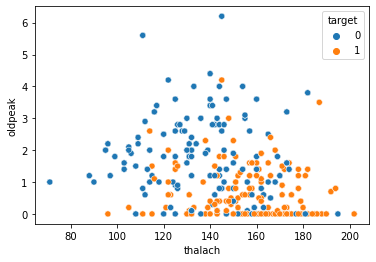

In [10]:
sns.scatterplot(data=heart_df, x="thalach", y="oldpeak", hue="target")


* build the 3d plot to see the data comprehensively

In [12]:

import plotly.express as px

In [20]:
# scatterplot among thalach, oldpeak , cp and exang
fig = px.scatter_3d(heart_df, x='thalach', y='oldpeak', z='cp', color='target', symbol='exang')
fig.show()
# exang=0 --- ball
# exang=1 --- square

* when target=1 thr proportion of exang=0
* when target

In [27]:
target0_ex = pd.DataFrame(target0["exang"].value_counts()).rename(columns={"exang": "target0"})
target1_ex = pd.DataFrame(target1["exang"].value_counts()).rename(columns={"exang": "target1"})
target_ex = pd.merge(target0_ex, target1_ex, left_index=True, right_index=True)
target_ex

,target0,target1
1.0,274,71
0.0,225,455


In [29]:
target0_slo = pd.DataFrame(target0["slope"].value_counts()).rename(columns={"slope": "target0"})
target1_slo = pd.DataFrame(target1["slope"].value_counts()).rename(columns={"slope": "target1"})
target_slo = pd.merge(target0_slo, target1_slo, left_index=True, right_index=True)
target_slo

,target0,target1
1.0,324,158
2.0,129,340
0.0,46,28
